# NAME: JAPNEET KAUR BHATIA

## Task # 3 - To Explore Unsupervised Machine Learning

## K- Means Clustering

### PROBLEM STATEMENT: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### DATASET : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [85]:
#import all libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [86]:
#loading dataset
df = pd.read_csv('Iris.csv')
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
#checking dimension of dataset
df.shape

(150, 6)

In [88]:
#checking all column names of dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [89]:
#calculating statistical data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [90]:
#check for number of null values in column
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C544742BC8>,
      dtype=object)

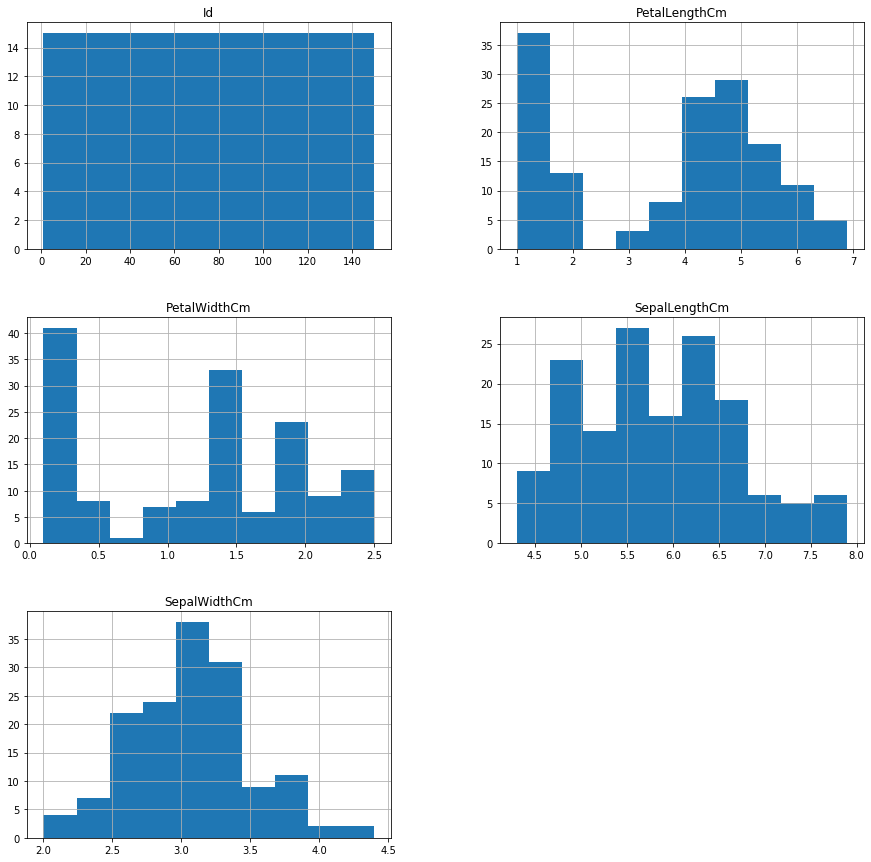

In [91]:
#creating a histogram for variables
df.hist(figsize = (15,15))

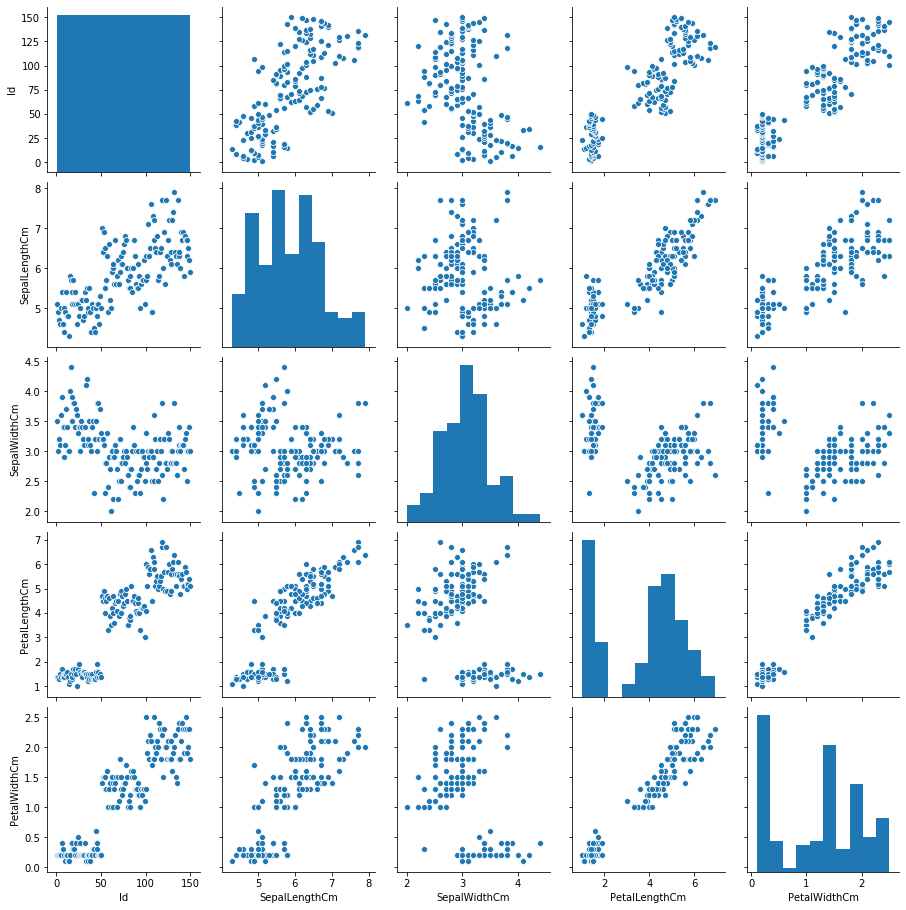

In [92]:
#to plot pairwise relationship in a dataset
sns.pairplot(df)

### to find the optimum number of clusters for K Means

In [93]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:,[1,2,3,4]].values

inner = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inner.append(kmeans.inertia_)

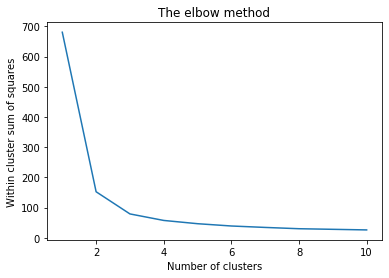

In [94]:
# Plotting the results in a line graph and to observe 'The elbow'

plt.plot(range(1, 11), inner)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

In [95]:
# Applying kmeans to the dataset and creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

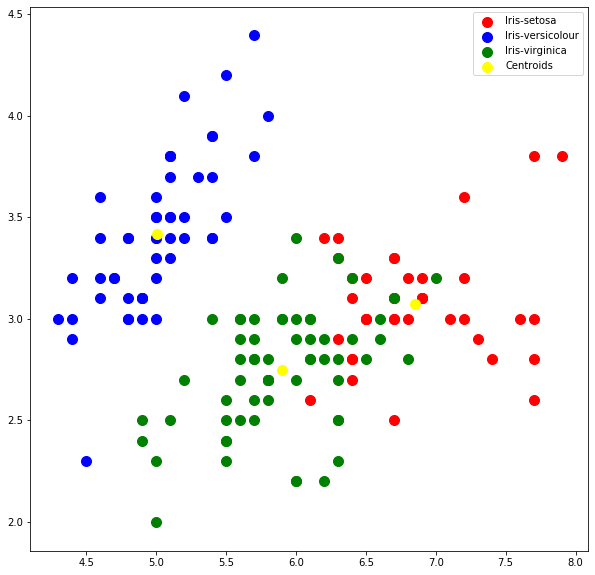

In [96]:
# Visualising the clusters on two columns
plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'upper right')
plt.show()